In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns

In [4]:
# Load dataset
dfX, dfY = pd.read_csv('../training_set_features.csv'), pd.read_csv("../training_set_labels.csv")
df = pd.merge(dfX, dfY, on="respondent_id", how="outer")

In [5]:
len(dfX), len(dfY), len(df)

(26707, 26707, 26707)

In [6]:
df

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [7]:
df

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [8]:
print("No of Rows:", len(df))
print("No of columns:", len(df.columns))
print("Columns:")
pprint(df.columns.to_list())

No of Rows: 26707
No of columns: 38
Columns:
['respondent_id',
 'xyz_concern',
 'xyz_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_xyz',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_xyz_vacc_effective',
 'opinion_xyz_risk',
 'opinion_xyz_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'household_adults',
 'household_children',
 'employment_industry',
 'employment_occupation',
 'xyz_vaccine',
 'seasonal_vaccine']


In [9]:
df.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [10]:
df.isnull().sum() * 100 / len(df)

respondent_id                   0.000000
xyz_concern                     0.344479
xyz_knowledge                   0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_xyz                 8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_xyz_vacc_effective      1.464036
opinion_xyz_risk                1.452803
opinion_xyz_sick_from_vacc      1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race            

In [11]:
nRows = len(df)

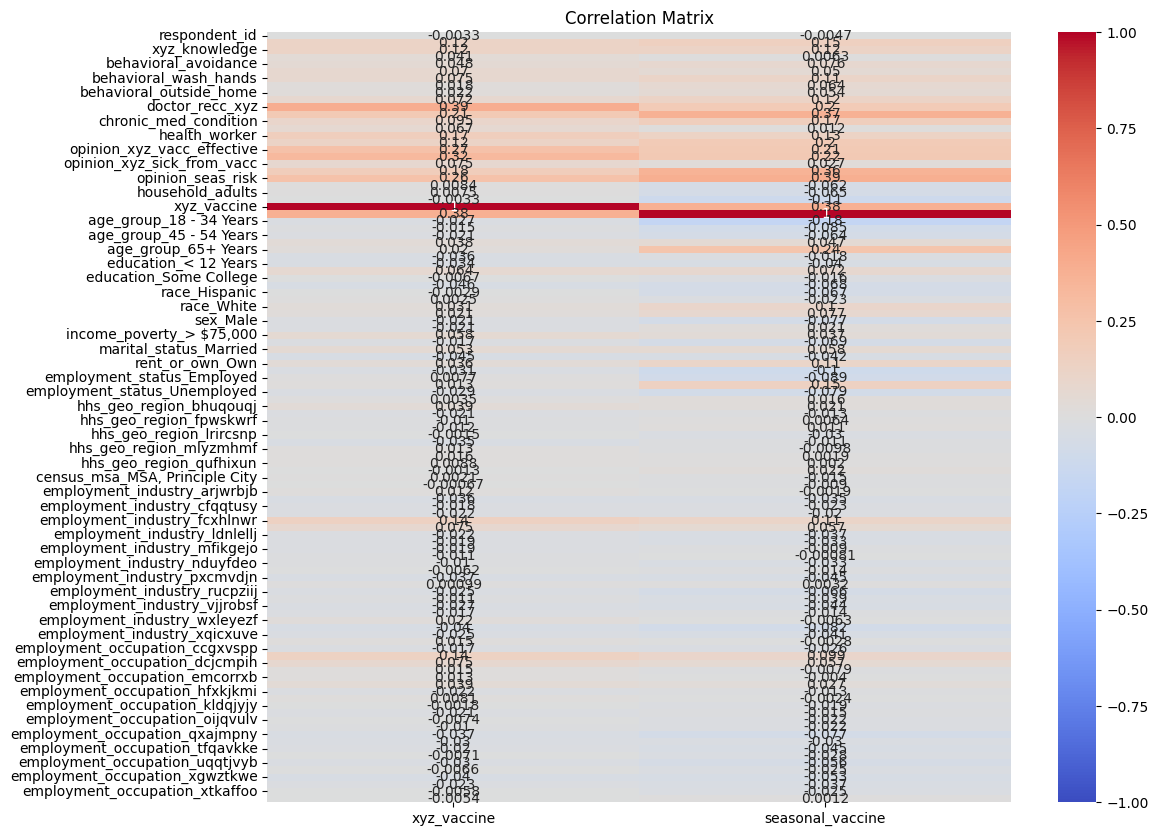

In [12]:
categorical_cols = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()
columns = corr_matrix.columns
subset_columns = columns[:]

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.loc[subset_columns, ['xyz_vaccine', 'seasonal_vaccine']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [13]:
filleddf = df.copy()

## Column wise Analysis
Going through each column one by one

### respondent_id

In [14]:
key = 'respondent_id'
print("Rows:", nRows)
print("Unique count:", df['respondent_id'].nunique(), "Ratio:", df['respondent_id'].nunique()/nRows)
print("Null count:", df['respondent_id'].isnull().sum(), df['respondent_id'].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 26707 Ratio: 1.0
Null count: 0 0.0


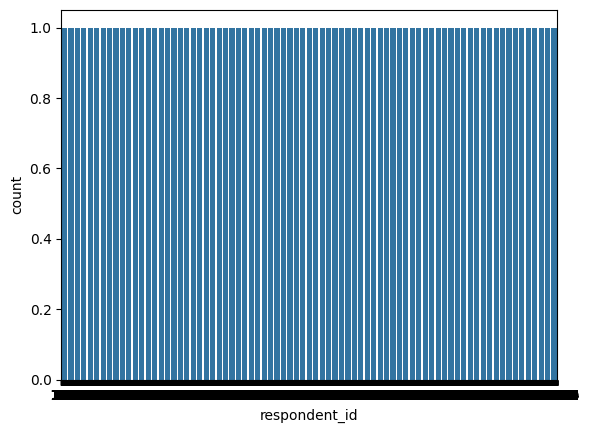

In [15]:
sns.countplot(x=key, data=df)
plt.show()

### xyz_concern

In [16]:
key = 'xyz_concern'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 4 Ratio: 0.0001497734676302093
Null count: 92 0.3444789755494814


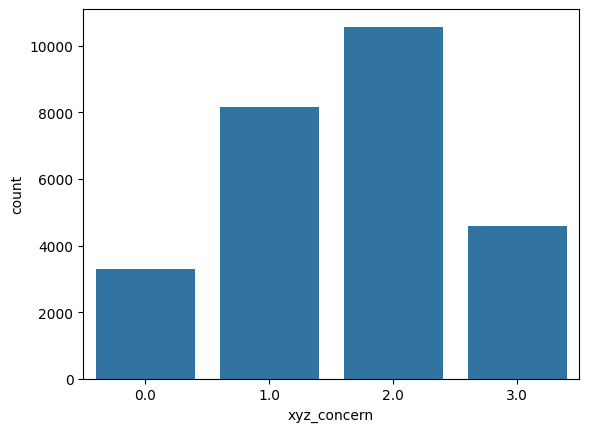

In [17]:
sns.countplot(x=key, data=df)
plt.show()

### xyz_knowledge

In [18]:
key = 'xyz_knowledge'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 3 Ratio: 0.00011233010072265698
Null count: 116 0.434343056127607


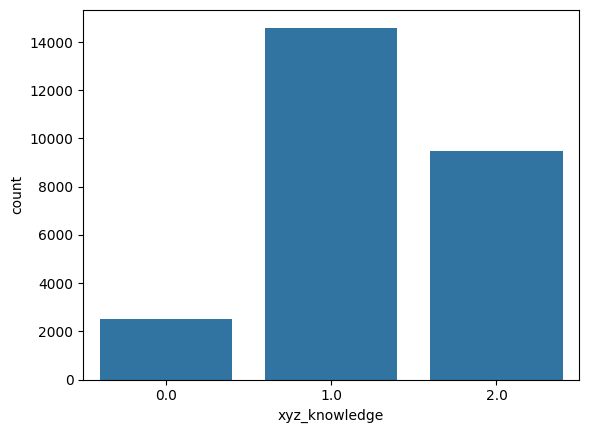

In [19]:
sns.countplot(x=key, data=df)
plt.show()

### behavioral_antiviral_meds

In [20]:
key = 'behavioral_antiviral_meds'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 2 Ratio: 7.488673381510466e-05
Null count: 71 0.26584790504362155


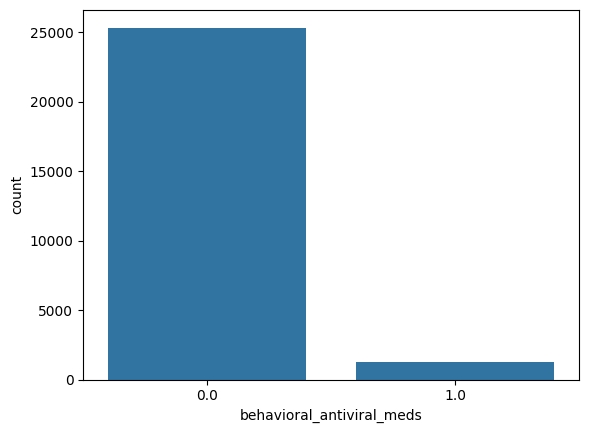

In [21]:
sns.countplot(x=key, data=df)
plt.show()

### behavioral_avoidance

In [22]:
key = 'behavioral_avoidance'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 2 Ratio: 7.488673381510466e-05
Null count: 208 0.7788220316770884


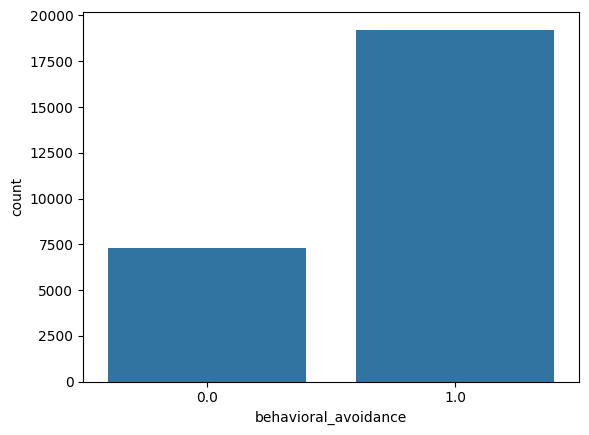

In [23]:
sns.countplot(x=key, data=df)
plt.show()

### behavioral_face_mask

In [24]:
key = 'behavioral_wash_hands'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 2 Ratio: 7.488673381510466e-05
Null count: 42 0.15726214101171979


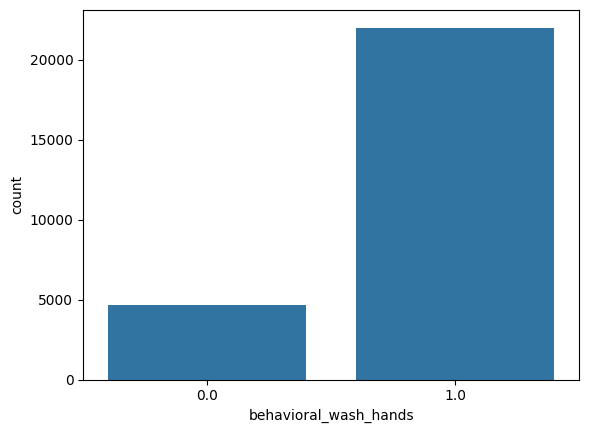

In [25]:
sns.countplot(x=key, data=df)
plt.show()

### behavioral_large_gatherings

In [26]:
key = 'behavioral_large_gatherings'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 2 Ratio: 7.488673381510466e-05
Null count: 87 0.32575729209570525


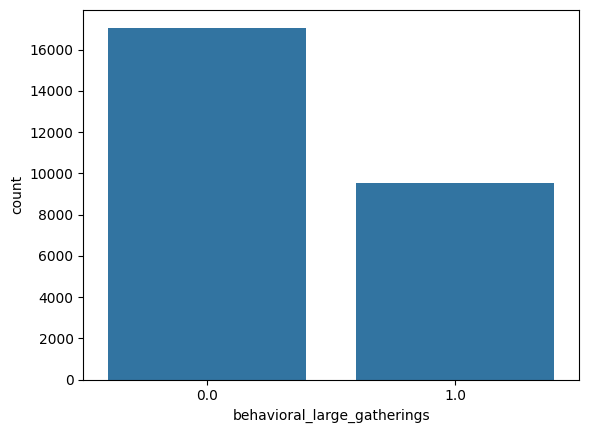

In [27]:
sns.countplot(x=key, data=df)
plt.show()

### behavioral_outside_home

In [28]:
key = 'behavioral_outside_home'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 2 Ratio: 7.488673381510466e-05
Null count: 82 0.3070356086419291


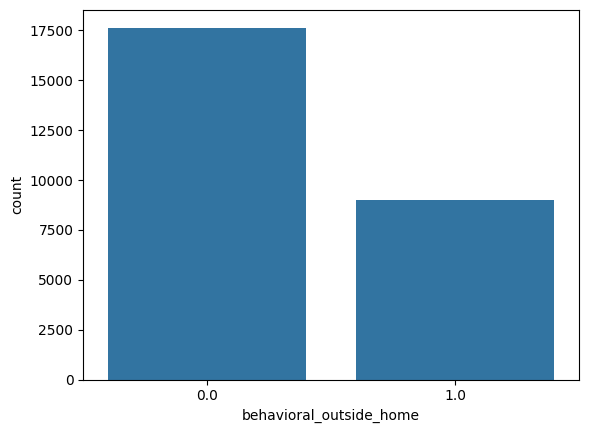

In [29]:
sns.countplot(x=key, data=df)
plt.show()

### behavioral_touch_face

In [30]:
key = 'behavioral_touch_face'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 2 Ratio: 7.488673381510466e-05
Null count: 128 0.47927509641666977


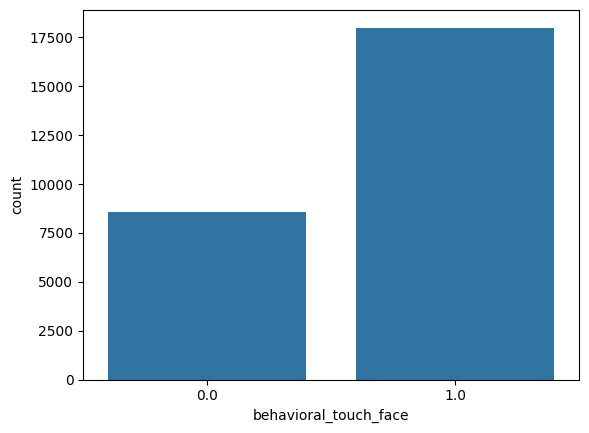

In [31]:
sns.countplot(x=key, data=df)
plt.show()

### doctor_recc_xyz

In [32]:
key = 'doctor_recc_xyz'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 2 Ratio: 7.488673381510466e-05
Null count: 2160 8.087767252031302


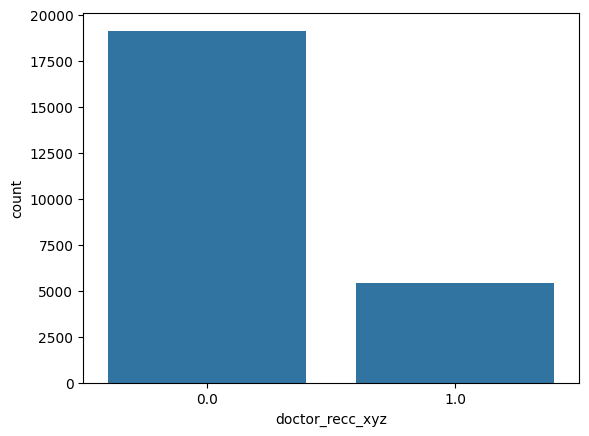

In [33]:
sns.countplot(x=key, data=df)
plt.show()

### doctor_recc_seasonal

In [34]:
key = 'doctor_recc_seasonal'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 2 Ratio: 7.488673381510466e-05
Null count: 2160 8.087767252031302


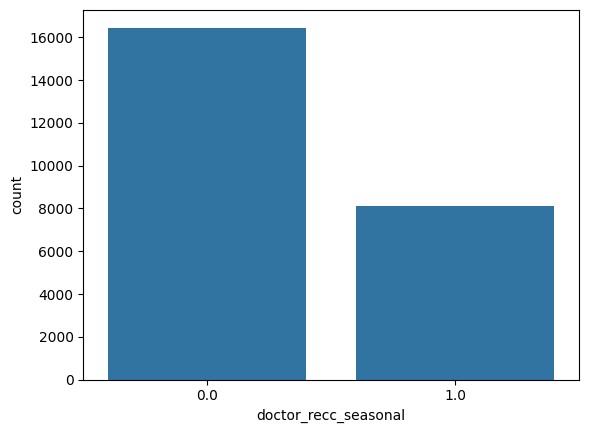

In [35]:
sns.countplot(x=key, data=df)
plt.show()

### chronic_med_condition

In [36]:
key = 'chronic_med_condition'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 2 Ratio: 7.488673381510466e-05
Null count: 971 3.635750926723331


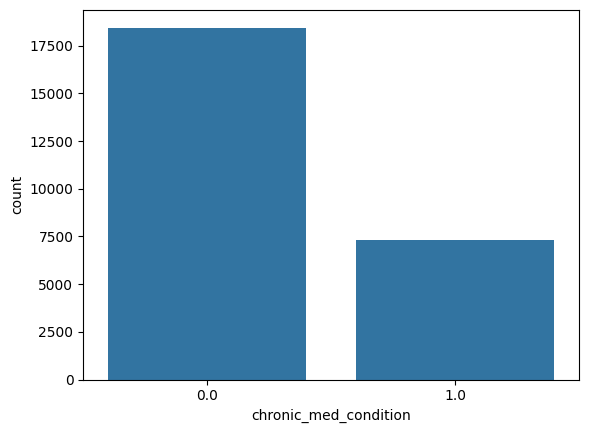

In [37]:
sns.countplot(x=key, data=df)
plt.show()

### child_under_6_months

In [38]:
key = 'child_under_6_months'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 2 Ratio: 7.488673381510466e-05
Null count: 820 3.0703560864192907


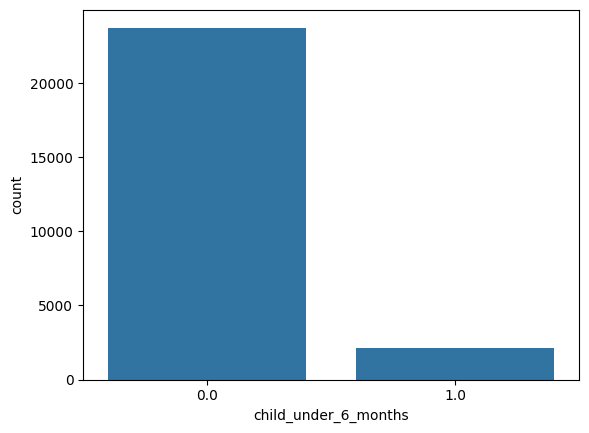

In [39]:
sns.countplot(x=key, data=df)
plt.show()

### health_worker

In [40]:
key = 'health_worker'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 2 Ratio: 7.488673381510466e-05
Null count: 804 3.010446699367207


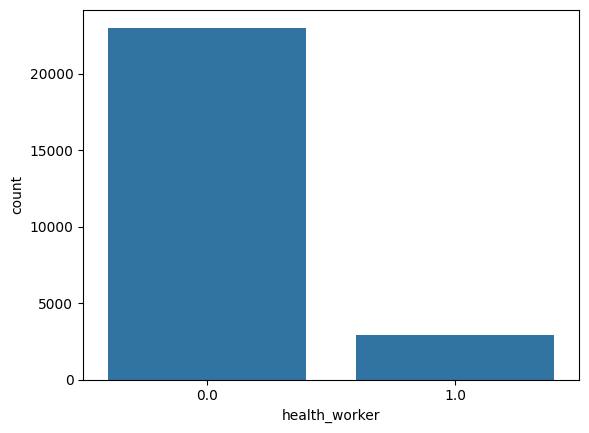

In [41]:
sns.countplot(x=key, data=df)
plt.show()

### health_insurance

In [42]:
key = 'health_insurance'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 2 Ratio: 7.488673381510466e-05
Null count: 12274 45.95798854232972


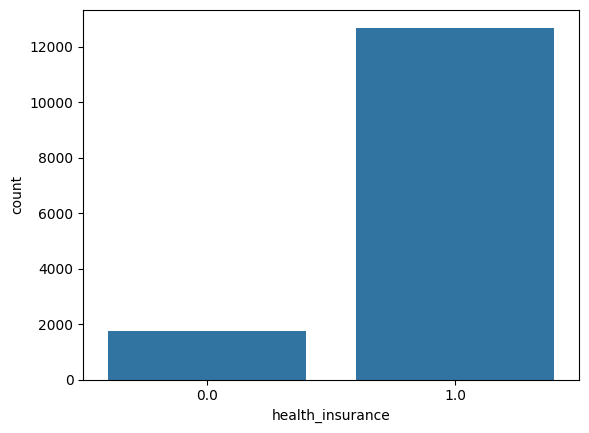

In [43]:
sns.countplot(x=key, data=df)
plt.show()

### opinion_xyz_vacc_effective

In [44]:
key = 'opinion_xyz_vacc_effective'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 5 Ratio: 0.00018721683453776163
Null count: 391 1.464035646085296


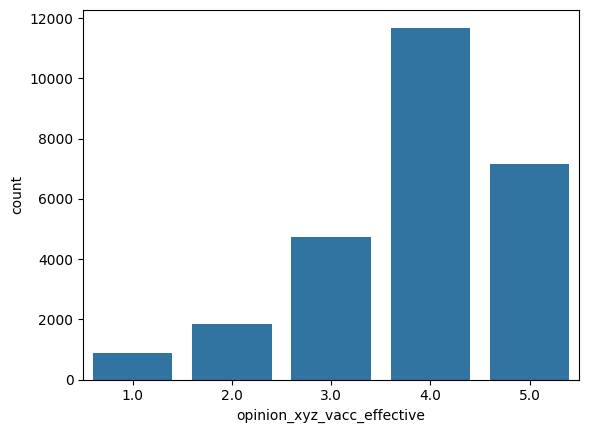

In [45]:
sns.countplot(x=key, data=df)
plt.show()

### opinion_xyz_risk

In [46]:
key = 'opinion_xyz_risk'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 5 Ratio: 0.00018721683453776163
Null count: 388 1.4528026360130304


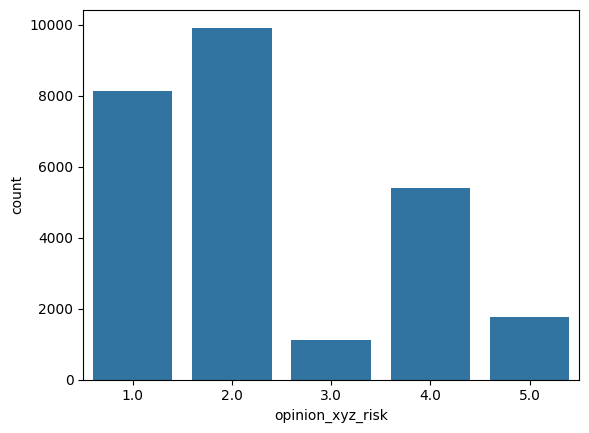

In [47]:
sns.countplot(x=key, data=df)
plt.show()

### opinion_xyz_sick_from_vacc

In [48]:
key = 'opinion_xyz_sick_from_vacc'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 5 Ratio: 0.00018721683453776163
Null count: 395 1.4790129928483169


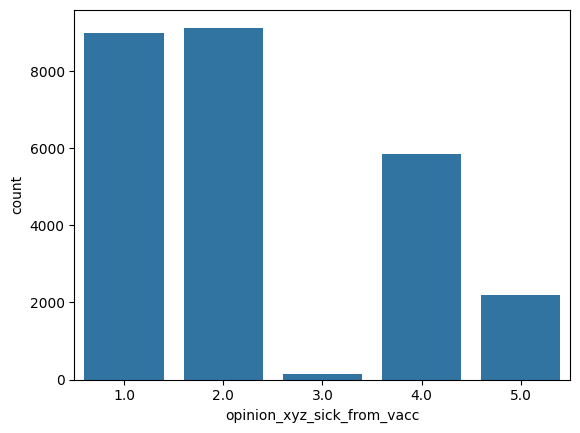

In [49]:
sns.countplot(x=key, data=df)
plt.show()

### opinion_seas_vacc_effective

In [50]:
key = 'opinion_seas_vacc_effective'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 5 Ratio: 0.00018721683453776163
Null count: 462 1.7298835511289175


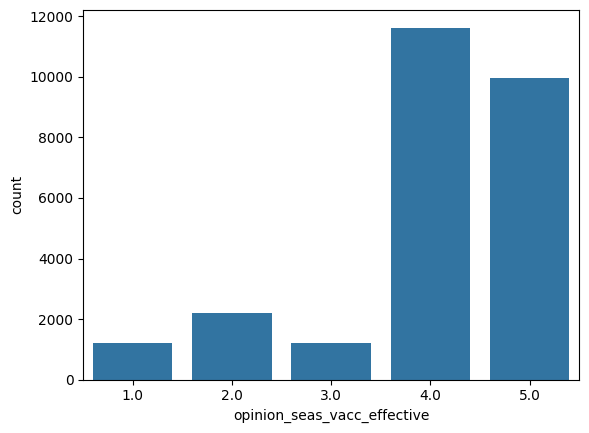

In [51]:
sns.countplot(x=key, data=df)
plt.show()

### opinion_seas_sick_from_vacc

In [52]:
key = 'opinion_seas_sick_from_vacc'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 5 Ratio: 0.00018721683453776163
Null count: 537 2.01070880293556


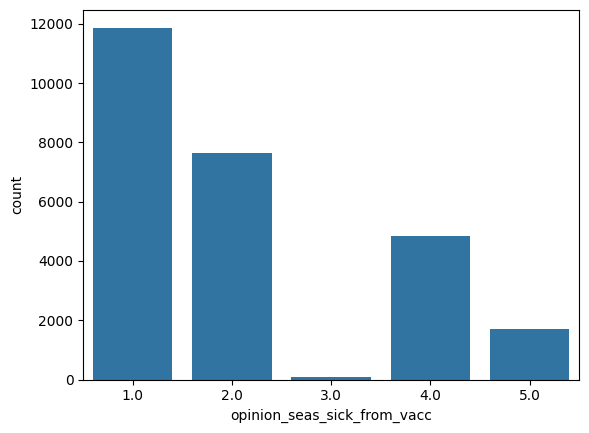

In [53]:
sns.countplot(x=key, data=df)
plt.show()

In [54]:
df[key].median()

2.0

### age_group

In [55]:
key = 'age_group'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 5 Ratio: 0.00018721683453776163
Null count: 0 0.0


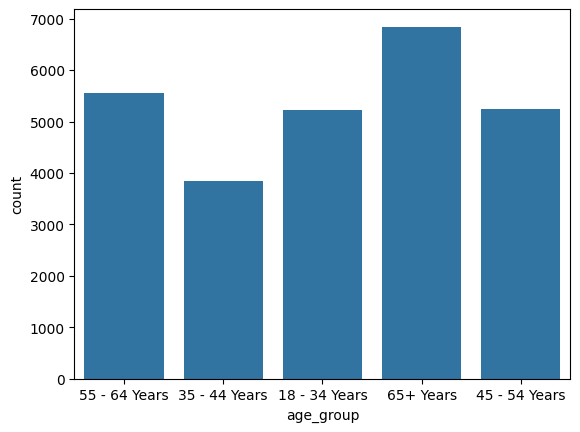

In [56]:
sns.countplot(x=key, data=df)
plt.show()

### education

In [57]:
key = 'education'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 4 Ratio: 0.0001497734676302093
Null count: 1407 5.2682817238926125


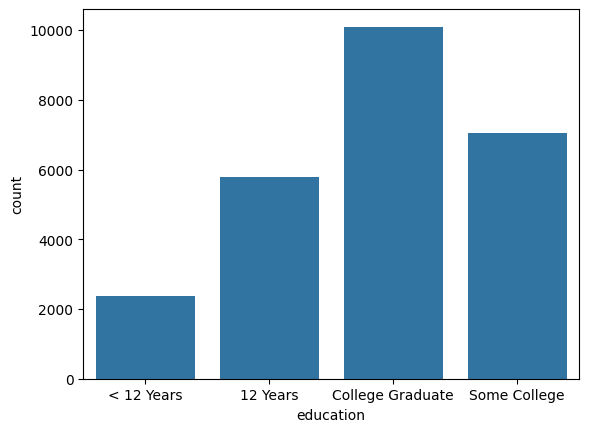

In [58]:
sns.countplot(x=key, data=df)
plt.show()

### race

In [59]:
key = 'race'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 4 Ratio: 0.0001497734676302093
Null count: 0 0.0


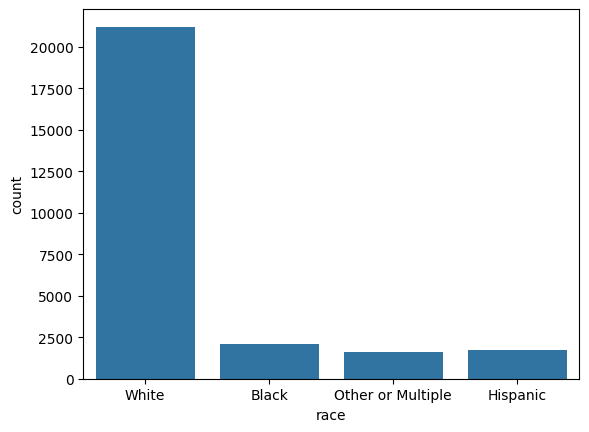

In [60]:
sns.countplot(x=key, data=df)
plt.show()

### sex

In [61]:
key = 'sex'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 2 Ratio: 7.488673381510466e-05
Null count: 0 0.0


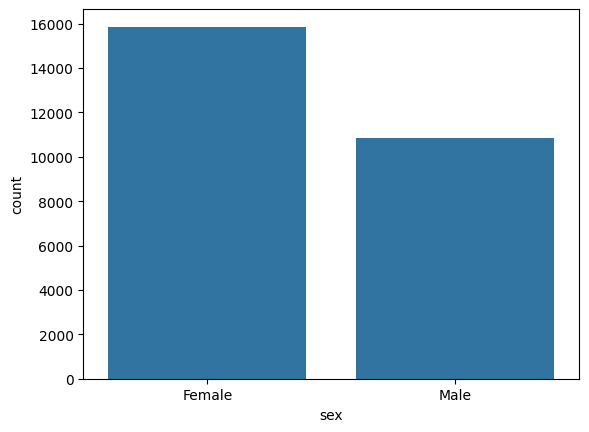

In [62]:
sns.countplot(x=key, data=df)
plt.show()

### income_poverty

In [63]:
key = 'income_poverty'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 3 Ratio: 0.00011233010072265698
Null count: 4423 16.561201183210393


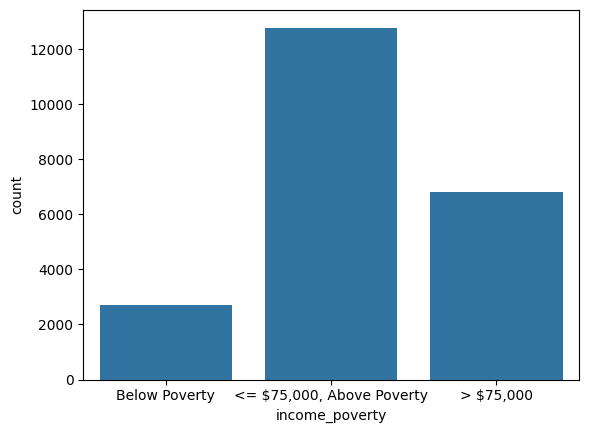

In [64]:
sns.countplot(x=key, data=df)
plt.show()

### marital_status

In [65]:
key = 'marital_status'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 2 Ratio: 7.488673381510466e-05
Null count: 1408 5.272026060583368


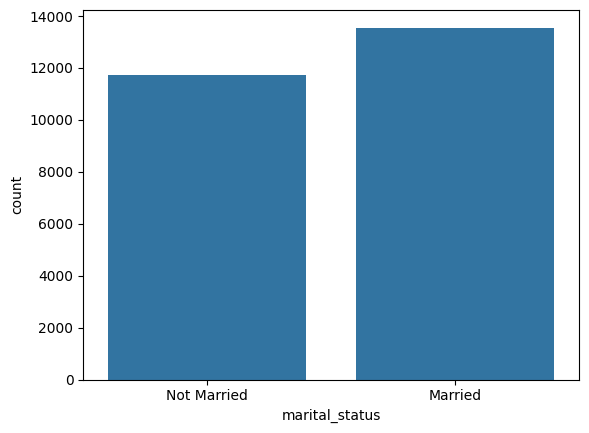

In [66]:
sns.countplot(x=key, data=df)
plt.show()

### rent_or_own

In [67]:
key = 'rent_or_own'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 2 Ratio: 7.488673381510466e-05
Null count: 2042 7.645935522522185


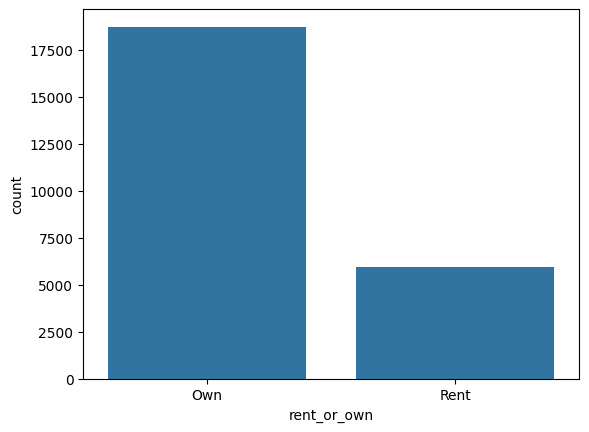

In [68]:
sns.countplot(x=key, data=df)
plt.show()

### employment_status

In [69]:
key = 'employment_status'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 3 Ratio: 0.00011233010072265698
Null count: 1463 5.477964578574905


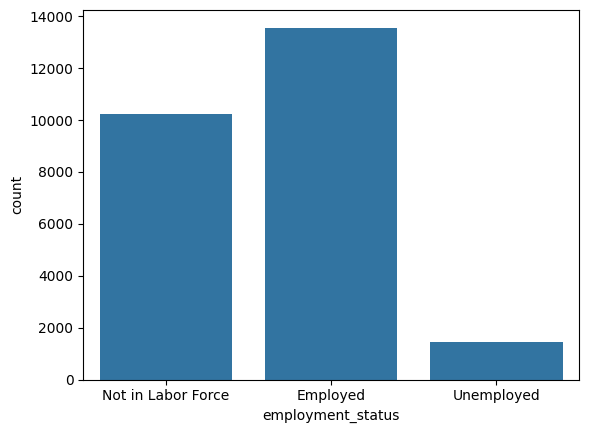

In [70]:
sns.countplot(x=key, data=df)
plt.show()

### hhs_geo_region

In [71]:
key = 'hhs_geo_region'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 10 Ratio: 0.00037443366907552325
Null count: 0 0.0


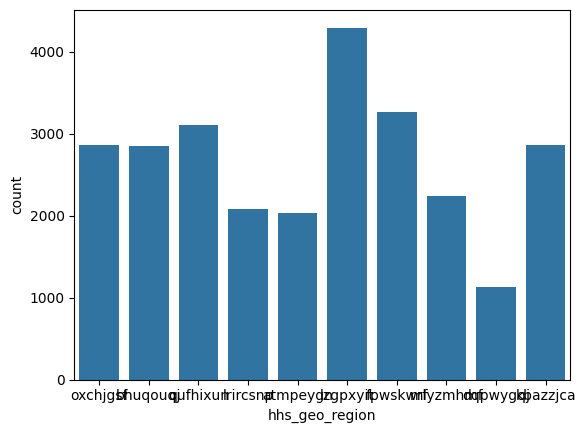

In [72]:
sns.countplot(x=key, data=df)
plt.show()

### census_msa

In [73]:
key = 'census_msa'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 3 Ratio: 0.00011233010072265698
Null count: 0 0.0


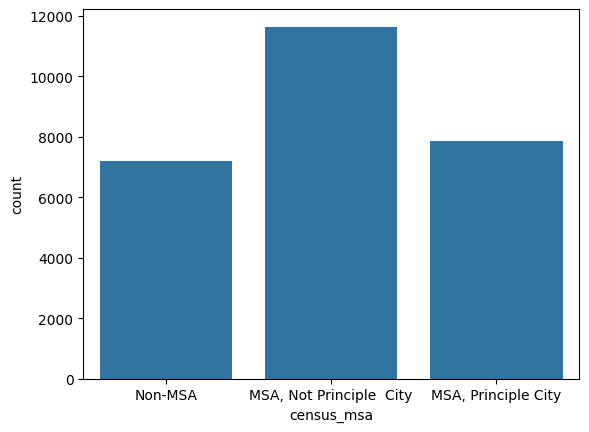

In [74]:
sns.countplot(x=key, data=df)
plt.show()

### household_adults

In [75]:
key = 'household_adults'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 4 Ratio: 0.0001497734676302093
Null count: 249 0.9323398359980529


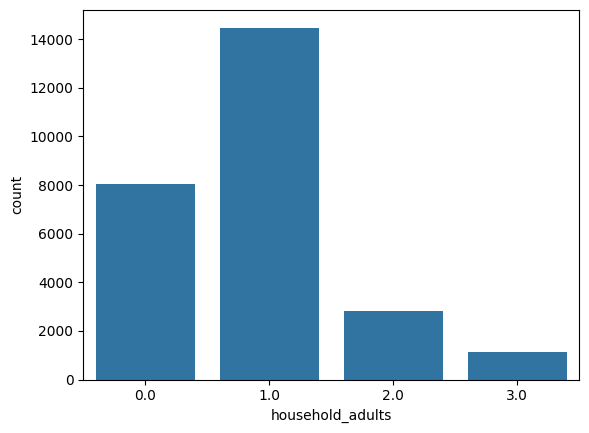

In [76]:
sns.countplot(x=key, data=df)
plt.show()

### household_children

In [77]:
key = 'household_children'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 4 Ratio: 0.0001497734676302093
Null count: 249 0.9323398359980529


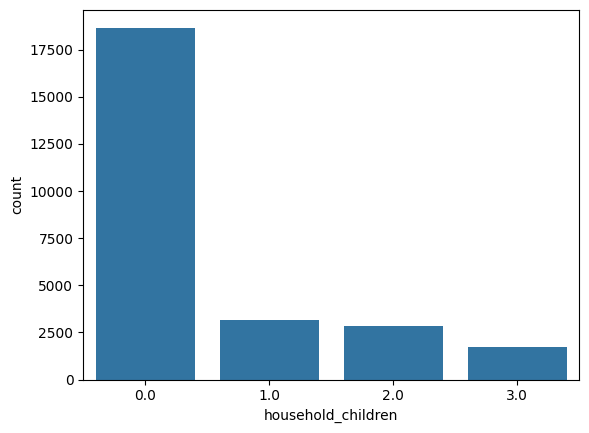

In [78]:
sns.countplot(x=key, data=df)
plt.show()

### employment_industry

In [79]:
key = 'employment_industry'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 21 Ratio: 0.0007863107050585989
Null count: 13330 49.912008087767255


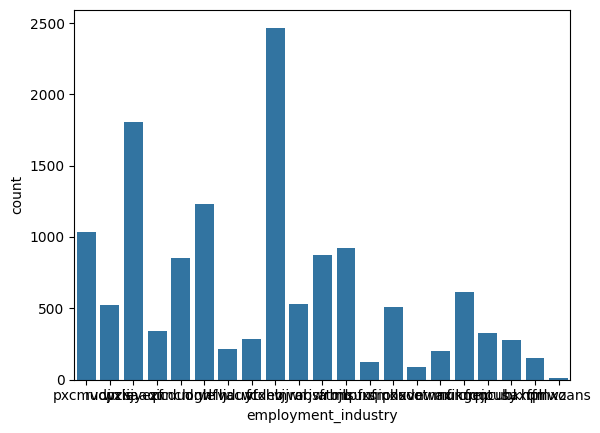

In [80]:
sns.countplot(x=key, data=df)
plt.show()

### employment_occupation

In [81]:
key = 'employment_occupation'
print("Rows:", nRows)
print("Unique count:", df[key].nunique(), "Ratio:", df[key].nunique()/nRows)
print("Null count:", df[key].isnull().sum(), df[key].isnull().sum() * 100 / len(df))

Rows: 26707
Unique count: 23 Ratio: 0.0008611974388737035
Null count: 13470 50.43621522447298


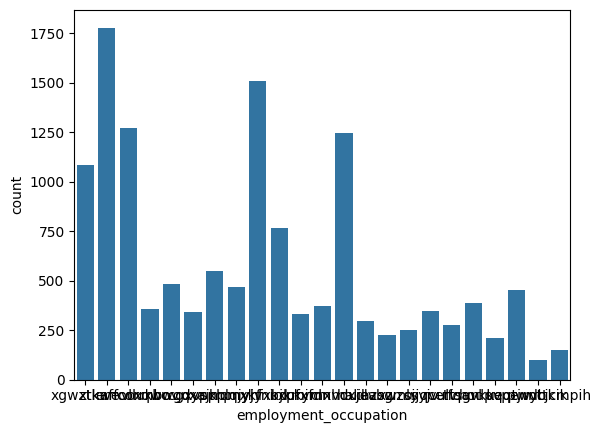

In [82]:
sns.countplot(x=key, data=df)
plt.show()

In [83]:
df['sex'].mode()

0    Female
Name: sex, dtype: object

In [84]:
pprint([(i, df[i].mode()[0] == df[i].median()) for i in df.columns if type(df[i].mode()[0]) is not str])

[('respondent_id', False),
 ('xyz_concern', True),
 ('xyz_knowledge', True),
 ('behavioral_antiviral_meds', True),
 ('behavioral_avoidance', True),
 ('behavioral_face_mask', True),
 ('behavioral_wash_hands', True),
 ('behavioral_large_gatherings', True),
 ('behavioral_outside_home', True),
 ('behavioral_touch_face', True),
 ('doctor_recc_xyz', True),
 ('doctor_recc_seasonal', True),
 ('chronic_med_condition', True),
 ('child_under_6_months', True),
 ('health_worker', True),
 ('health_insurance', True),
 ('opinion_xyz_vacc_effective', True),
 ('opinion_xyz_risk', True),
 ('opinion_xyz_sick_from_vacc', True),
 ('opinion_seas_vacc_effective', True),
 ('opinion_seas_risk', True),
 ('opinion_seas_sick_from_vacc', False),
 ('household_adults', True),
 ('household_children', True),
 ('xyz_vaccine', True),
 ('seasonal_vaccine', True)]


In [85]:
len(['' for i in df.columns if type(df[i].mode()[0]) is not str])

26

In [86]:
for col in df.columns:
    v = filleddf[col].mode()[0]
    filleddf[col] = filleddf[col].fillna(v)

In [87]:
filleddf['health_insurance'] = df['health_insurance'].fillna(2)
filleddf['employment_industry'] = df['employment_industry'].fillna('NA')
filleddf['employment_occupation'] = df['employment_occupation'].fillna('NA')

In [88]:
filleddf.isna().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [89]:
filleddf['employment_occupation'].value_counts()

employment_occupation
NA          13470
xtkaffoo     1778
mxkfnird     1509
emcorrxb     1270
cmhcxjea     1247
xgwztkwe     1082
hfxkjkmi      766
qxajmpny      548
xqwwgdyp      485
kldqjyjy      469
uqqtjvyb      452
tfqavkke      388
ukymxvdu      372
vlluhbov      354
oijqvulv      344
ccgxvspp      341
bxpfxfdn      331
haliazsg      296
rcertsgn      276
xzmlyyjv      248
dlvbwzss      227
hodpvpew      208
dcjcmpih      148
pvmttkik       98
Name: count, dtype: int64

## Preprocessing

In [90]:
# Define features and target variables
X = filleddf.drop(columns=[
    'respondent_id', 'xyz_vaccine', 'seasonal_vaccine',
    # 'health_insurance',  'employment_industry', 'employment_occupation',
])
y = filleddf[['xyz_vaccine', 'seasonal_vaccine']]


In [91]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns


In [92]:
# Preprocessing pipeline for numerical data
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical data
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [93]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

# Apply transformations
X_processed = preprocessor.fit_transform(X)

In [94]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


## Model

In [95]:
# Initialize and train the model
model = MultiOutputClassifier(RandomForestClassifier(random_state=42))
model.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [96]:
# Predict probabilities
y_pred_prob = model.predict_proba(X_test)

# Extract probabilities for each target variable
xyz_vaccine_pred_prob = y_pred_prob[0][:, 1]
seasonal_vaccine_pred_prob = y_pred_prob[1][:, 1]


In [97]:
# Calculate ROC AUC scores
roc_auc_xyz = roc_auc_score(y_test['xyz_vaccine'], xyz_vaccine_pred_prob)
roc_auc_seasonal = roc_auc_score(y_test['seasonal_vaccine'], seasonal_vaccine_pred_prob)
mean_roc_auc = (roc_auc_xyz + roc_auc_seasonal) / 2

print(f'ROC AUC for XYZ Vaccine: {roc_auc_xyz}')
print(f'ROC AUC for Seasonal Vaccine: {roc_auc_seasonal}')
print(f'Mean ROC AUC: {mean_roc_auc}')

ROC AUC for XYZ Vaccine: 0.8602587213944146
ROC AUC for Seasonal Vaccine: 0.8532246913245726
Mean ROC AUC: 0.8567417063594935


## Submission

In [107]:
test = pd.read_csv("../test_set_features.csv")


In [108]:
test['health_insurance'] = test['health_insurance'].fillna(2)
test['employment_industry'] = test['employment_industry'].fillna('NA')
test['employment_occupation'] = test['employment_occupation'].fillna('NA')

In [109]:
for col in test.columns:
    v = test[col].mode()[0]
    test[col] = test[col].fillna(v)

In [110]:
test.isna().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [112]:

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

# Apply transformations
testX_processed = preprocessor.fit_transform(test.drop(columns=['respondent_id']))

In [113]:
testYpred = model.predict_proba(testX_processed)

In [114]:
# Extract probabilities for each target variable
test_xyz_vaccine_pred_prob = testYpred[0][:, 1]
test_seasonal_vaccine_pred_prob = testYpred[1][:, 1]

In [117]:
submission = pd.DataFrame()
submission['respondent_id'] = test['respondent_id']
submission['xyz_vaccine'] = test_xyz_vaccine_pred_prob
submission['seasonal_vaccine'] = test_seasonal_vaccine_pred_prob

In [118]:
submission.to_csv("submission.csv", index=False)